<a href="https://colab.research.google.com/github/luizahenriques/demo/blob/main/Lista1ADR_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Questão 4, letra e  f
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# Parâmetros do modelo AR(1)
pi_0 = 3.00  # Valor inicial
alpha = 0.7  # Coeficiente AR(1)
mu_epsilon = -1.2  # Média da distribuição logNormal
sigma_epsilon = 1  # Desvio padrão da distribuição logNormal

# Número de períodos
T = 42  # Horizonte de análise
num_simulations = 5000  # Número de cenários a simular


taxa_desconto= 1.05
Q = 1
VPS_por_Q = []
VPQEstrela = []


# Simulação dos caminhos de preços
simulations = np.zeros((num_simulations, T))
for Q in range(201):
    VPS = []
    for i in range(num_simulations):
        epsilon = np.random.lognormal(mean=mu_epsilon, sigma=sigma_epsilon, size=T)
        pi = np.zeros(T)
        pi[0] = pi_0
        VP = 0

        for t in range(1, T):
            pi[t] = 0.5 + alpha * pi[t-1] + epsilon[t]

            if t <= 3:
                VP += -15 * Q / (taxa_desconto ** t)
                VP += 100 * (pi[t] - 1) / (taxa_desconto ** t)
            else:
                VP += (pi[t] * Q - 0.01 * Q ** 2) / (taxa_desconto ** t)

        VPS.append(VP) #Terei um VP para cada cenário i
        if Q == 21: #Pegando apenas o vetor de VPLs do q ÓTIMO
          VPQEstrela.append(VP)
        simulations[i] = pi

    # Calculando a média dos VPs para este Q
    media_VP = np.mean(VPS) #Faço o VP médio dos 5000 cenários
    VPS_por_Q.append(media_VP) #Cada Q terá um valor VP de média









In [11]:
#Probabilidade do VPQEstrela ter valores negativos


# Contando o número de valores negativos
num_negativos = sum(vp < 0 for vp in VPQEstrela)

# Calculando a probabilidade de valores negativos
probabilidade_negativos = num_negativos / len(VPQEstrela)
print(probabilidade_negativos)

0.0


In [ ]:
indice_max_vp = np.argmax(VPS_por_Q)
valor_max_q = indice_max_vp
print(valor_max_q)

In [ ]:
# Plotando o gráfico Q por VP
plt.plot(range(201), VPS_por_Q)
plt.xlabel('Q')
plt.ylabel('Valor Presente (VP)')
plt.title('Valor Presente (VP) em função de Q')
plt.grid(True)
plt.show()

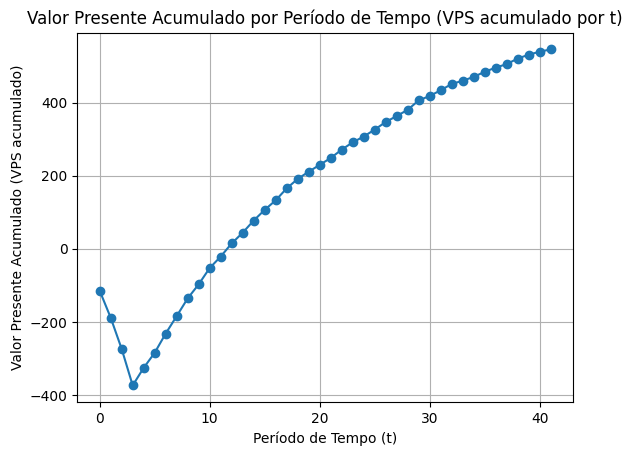

In [24]:
# Letra i
VPS = []
Q=21
for t in range(T):
    VP_t = 0  # Inicializa o valor presente para o período t
    epsilon = np.random.lognormal(mean=mu_epsilon, sigma=sigma_epsilon, size=T)
    # Loop para cada simulação (i)
    for i in range(num_simulations):
        pi = np.zeros(T)
        pi[0] = pi_0

        for j in range(1, t + 1):
            pi[j] = 0.5 + alpha * pi[j-1] + epsilon[j]

        if t <= 3:
            VP_t += -15 * Q / (taxa_desconto ** t)
            VP_t += 100 * (pi[t] - 1) / (taxa_desconto ** t)
        else:
            VP_t += (pi[t] * Q - 0.01 * Q ** 2) / (taxa_desconto ** t)

    VP_t /= num_simulations  # Calcula a média do VP para o período t
    VPS.append(VP_t)  # Adiciona o VP médio à lista VPS
# Calcula os valores acumulados de VPS
VPS_acumulado = np.cumsum(VPS)

# Plot do gráfico VPS acumulado por t
plt.plot(range(T), VPS_acumulado, marker='o')
plt.title('Valor Presente Acumulado por Período de Tempo (VPS acumulado por t)')
plt.xlabel('Período de Tempo (t)')
plt.ylabel('Valor Presente Acumulado (VPS acumulado)')
plt.grid(True)
plt.show()

In [26]:
indice_zero = np.where(np.abs(VPS_acumulado) == np.min(np.abs(VPS_acumulado)))[0][0]

# Obtenha o valor de t correspondente a esse índice
t_valor_zero = indice_zero

print("Valor de t para o qual o acumulado é 0:", t_valor_zero)

Valor de t para o qual o acumulado é 0: 12


In [ ]:

# Plotagem dos cenários simulados
plt.figure(figsize=(10, 6))
for i in range(num_simulations):
    plt.plot(range(T), simulations[i], linewidth=0.5, alpha=0.5)
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.title('Caminhos de Preços Simulados')
plt.grid(True)
plt.show()